In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#memanggil file Csv
df = pd.read_csv('labeling1.csv')

NameError: ignored

In [ ]:
#membuat CountVectorizer dengan menggunakan Bigram
vectorizer = CountVectorizer(ngram_range=(2,2))
x = vectorizer.fit_transform(df['text_preprocessed'])
len(vectorizer.get_feature_names_out())


142777

In [ ]:
#memanggil Nama fitur jika menggunakan Visual studio Klik variables lalu klik gf
gf = vectorizer.get_feature_names_out()
print(gf)


['aa tapi' 'aa turut' 'aaaaaa aku' ... 'zuckerberg masuk' 'zulfanz sudah'
 'zurich insurance']


In [ ]:
#mengubah ke array
x.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
#Melihat jumlah Array 
print(x)

  (0, 142541)	1
  (0, 64135)	1
  (0, 116633)	1
  (0, 136878)	1
  (0, 125757)	1
  (0, 30897)	1
  (0, 101771)	1
  (0, 112315)	1
  (0, 125773)	1
  (0, 53966)	1
  (0, 136312)	1
  (0, 2888)	1
  (0, 51685)	1
  (0, 105529)	1
  (0, 8822)	1
  (0, 134364)	1
  (0, 113007)	1
  (0, 128771)	1
  (0, 21836)	1
  (1, 51685)	1
  (1, 142642)	1
  (1, 56038)	1
  (1, 72849)	1
  (1, 106476)	1
  (1, 88291)	1
  :	:
  (17856, 51604)	1
  (17856, 141967)	1
  (17856, 6180)	1
  (17856, 55967)	1
  (17856, 71620)	1
  (17856, 106383)	1
  (17856, 137728)	1
  (17856, 36272)	1
  (17856, 92820)	1
  (17856, 82525)	1
  (17856, 94003)	1
  (17856, 69799)	1
  (17856, 77598)	1
  (17856, 3978)	1
  (17856, 42869)	1
  (17856, 98552)	1
  (17856, 82398)	1
  (17856, 125772)	1
  (17856, 52324)	1
  (17856, 136159)	1
  (17856, 93996)	1
  (17856, 40803)	1
  (17856, 137740)	1
  (17856, 57985)	1
  (17856, 30093)	1


<AxesSubplot:>

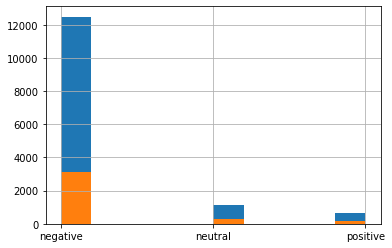

In [ ]:
#Diagram Untuk melihat Perbandingan antara Class data data training dan testing , dan pembuatan data testing pada Test size sebesar 0.2 atau 20% dan otomatis data training 0.8 80%
# x = df['text_preprocessed']
y = df['polarity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
y_train.hist()
y_test.hist()

In [ ]:
# x_train = vectorizer.transform(x_train)
# x_test = vectorizer.transform(x_test)

In [ ]:
# x_train.toarray()

In [ ]:
#Klasifikasi Menggunakan Naine Bayes 
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(x_train,y_train)
predicted = clf.predict(x_test)
print("Naive Bayes: ", accuracy_score(y_test,predicted))


Naive Bayes:  0.8101903695408734


In [ ]:
#melihat jumlah label point yang salah dari total point
print("jumlah label point yang salah dari total %d point = %d"
      % (x_test.shape[0], (y_test != predicted).sum()))

jumlah label point yang salah dari total 3572 point = 678


In [ ]:
#melihat nilai klasifikasi dan nilai sebenernya
print("Naive Bayes: ", confusion_matrix(y_test,predicted))
multilabel_confusion_matrix(y_test, predicted,labels=["negative", "positve", "Neutral"])



Naive Bayes:  [[2806  233   68]
 [ 224   47   14]
 [  97   42   41]]


array([[[ 144,  321],
        [ 301, 2806]],

       [[3572,    0],
        [   0,    0]],

       [[3572,    0],
        [   0,    0]]], dtype=int64)

In [ ]:
print("Akurasi: ", accuracy_score(y_test,predicted,normalize=False))
print("Akurasi: ", accuracy_score(y_test,predicted))
print("precision ", precision_score(y_test,predicted , average=None))#tp / (tp + fp)`` where ``tp`` is the number of true positives and ``fp`` the number of false positives.
print("Recall: ", recall_score(y_test,predicted, average=None))#tp / (tp + fn)`` where ``tp`` is the number of true positives and ``fn`` the number of false negatives.
print("f1_score: ", f1_score(y_test,predicted, average=None)) #F1 = 2 * (precision * recall) / (precision + recall)

Akurasi:  2894
Akurasi:  0.8101903695408734
precision  [0.8973457  0.14596273 0.33333333]
Recall:  [0.90312198 0.16491228 0.22777778]
f1_score:  [0.90022457 0.15485997 0.27062706]


In [ ]:
#melihat Classificcation Report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

    negative       0.90      0.90      0.90      3107
     neutral       0.15      0.16      0.15       285
    positive       0.33      0.23      0.27       180

    accuracy                           0.81      3572
   macro avg       0.46      0.43      0.44      3572
weighted avg       0.81      0.81      0.81      3572



In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,
                     index = ['Negative','Neutral','Positive'], 
                     columns = ['Negative','Neutral','Positive'])
                     


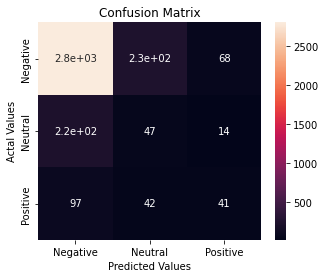

In [ ]:
#Memanggil Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#Membuat perhitungan manual Presisi Recall dan F1-score serta accurasi setiap class
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)


# Sensitivity, hit rate, recall, or true positive rate
Recall = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
Precision = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

#F1 = 2 * (precision * recall) / (precision + recall)
f1Score = 2 * (Precision * Recall) / (Precision + Recall)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
#pemanggilan hasil Confusion Matrix
print("Naive Bayes: ", confusion_matrix(y_test,predicted))
multilabel_confusion_matrix(y_test, predicted,labels=["negative","Neutral","positve"])
print("TP :" ,TP)
print("FP :" , FP)
print("TN :" , TN)
print("FN :" , FN)

print("Precision :", Precision)
print("Recall :", Recall)
print("f1-Score :",f1Score)


Naive Bayes:  [[2806  233   68]
 [ 224   47   14]
 [  97   42   41]]
TP : [2806.   47.   41.]
FP : [321. 275.  82.]
TN : [ 144. 3012. 3310.]
FN : [301. 238. 139.]
Precision : [0.8973457  0.14596273 0.33333333]
Recall : [0.90312198 0.16491228 0.22777778]
f1-Score : [0.90022457 0.15485997 0.27062706]
